# Report finale
## Primo progetto del corso di Big Data

## Componenti del gruppo:
- Alessandro Scardicchio - 519619
- Alexandru Rotariu - 519621

### Analisi del Dataset

In [1]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
#pd.set_option('display.max_colwidth', None)

In [2]:
df = pd.read_csv("./dataset/Reviews.csv", index_col=[0])

In [3]:
df.sample(5)

ProductId          UserId  \
Id                                   
192356  B006GA666U  A1IPOL2VVDSHF1   
82716   B00445R398  A28OWIVOP9SR8U   
408067  B002BCFHTY  A3A90CELVLOUP6   
65488   B001EQ55ZO  A3TPNC3TKGCCEI   
37001   B001FSISZK  A29JAG9ML7C9DR   

                                        ProfileName  HelpfulnessNumerator  \
Id                                                                          
192356                  Lars E. Farmer "amazonlars"                     1   
82716                                      G. Gavin                     1   
408067                         Nanciejeanne "Enjay"                     0   
65488   Raquel S. "Avid Amazon Fan and Kindle User"                     0   
37001                                       Karmala                     0   

        HelpfulnessDenominator  Score        Time  \
Id                                                  
192356                       1      4  1264982400   
82716                        1      5  1327708800   
408067                       0      4  1260489600   
65488                        0      4  1214352000   
37001                        0      5  1346371200   

                                                  Summary  \
Id                                                          
192356                                         Bold/burnt   
82716                    Yummy! Incredible with corn pone   
408067                  Not exactly sure how to rate this   
65488   It's All About The Pepper; It Just Sneaks Up O...   
37001                                             Yum!!!!   

                                                     Text  
Id                                                         
192356  This coffee is dark and bold. It does taste ki...  
82716   This is the best Hoppin John I've ever had-and...  
408067  I bought this mostly based on the reviews. I r...  
65488   Emerald Sea Salt & Pepper Cashews is all about...  
37001   I bought these at a local discount store.  Now...

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 568454 entries, 1 to 568454
Data columns (total 9 columns):
 #   Column                  Non-Null Count   Dtype 
---  ------                  --------------   ----- 
 0   ProductId               568454 non-null  object
 1   UserId                  568454 non-null  object
 2   ProfileName             568438 non-null  object
 3   HelpfulnessNumerator    568454 non-null  int64 
 4   HelpfulnessDenominator  568454 non-null  int64 
 5   Score                   568454 non-null  int64 
 6   Time                    568454 non-null  int64 
 7   Summary                 568427 non-null  object
 8   Text                    568454 non-null  object
dtypes: int64(4), object(5)
memory usage: 43.4+ MB


Sono presenti ~ 570.000 record nel dataset

In [5]:
df.isna().sum()

ProductId                  0
UserId                     0
ProfileName               16
HelpfulnessNumerator       0
HelpfulnessDenominator     0
Score                      0
Time                       0
Summary                   27
Text                       0
dtype: int64

* Sono presenti 16 datapoint aventi il campo **ProfileName** null
* Sono presenti 27 datapoint aventi il campo **Summary** null

Sebbene il **ProfileName** sia assente per alcuni datapoint, il corrispondente **UserId** è presente e quest'ultimo è sufficiente per identificare univocamente l'utente che ha scritto una review. In modo anologo, nonostante per alcuni datapoint sia assente il **Summary** si dispone comunque del **Text** corrispondente, che potrebbe fornire molte più informazioni sul contesto/messaggio della recensione.

In [6]:
df.nunique()

ProductId                  74258
UserId                    256059
ProfileName               218416
HelpfulnessNumerator         231
HelpfulnessDenominator       234
Score                          5
Time                        3168
Summary                   295742
Text                      393579
dtype: int64

In [7]:
df[df.duplicated(subset=["UserId","Time","Text"], keep='first')].shape

(174562, 9)

Sono presenti ~ 175.000 record duplicati

In generale, non è possibile che un utente abbia scritto la medesima recensione per più prodotti nello stesso istante di tempo.

In [8]:
df.drop_duplicates(subset=["UserId","Time","Text"], keep='first')

ProductId          UserId                      ProfileName  \
Id                                                                    
1       B001E4KFG0  A3SGXH7AUHU8GW                       delmartian   
2       B00813GRG4  A1D87F6ZCVE5NK                           dll pa   
3       B000LQOCH0   ABXLMWJIXXAIN  Natalia Corres "Natalia Corres"   
4       B000UA0QIQ  A395BORC6FGVXV                             Karl   
5       B006K2ZZ7K  A1UQRSCLF8GW1T    Michael D. Bigham "M. Wassir"   
...            ...             ...                              ...   
568450  B001EO7N10  A28KG5XORO54AY                 Lettie D. Carter   
568451  B003S1WTCU  A3I8AFVPEE8KI5                        R. Sawyer   
568452  B004I613EE  A121AA1GQV751Z                    pksd "pk_007"   
568453  B004I613EE   A3IBEVCTXKNOH          Kathy A. Welch "katwel"   
568454  B001LR2CU2  A3LGQPJCZVL9UC                         srfell17   

        HelpfulnessNumerator  HelpfulnessDenominator  Score        Time  \
Id                                                                        
1                          1                       1      5  1303862400   
2                          0                       0      1  1346976000   
3                          1                       1      4  1219017600   
4                          3                       3      2  1307923200   
5                          0                       0      5  1350777600   
...                      ...                     ...    ...         ...   
568450                     0                       0      5  1299628800   
568451                     0                       0      2  1331251200   
568452                     2                       2      5  1329782400   
568453                     1                       1      5  1331596800   
568454                     0                       0      5  1338422400   

                                   Summary  \
Id                                           
1                    Good Quality Dog Food   
2                        Not as Advertised   
3                    "Delight" says it all   
4                           Cough Medicine   
5                              Great taffy   
...                                    ...   
568450                 Will not do without   
568451                        disappointed   
568452            Perfect for our maltipoo   
568453  Favorite Training and reward treat   
568454                         Great Honey   

                                                     Text  
Id                                                         
1       I have bought several of the Vitality canned d...  
2       Product arrived labeled as Jumbo Salted Peanut...  
3       This is a confection that has been around a fe...  
4       If you are looking for the secret ingredient i...  
5       Great taffy at a great price.  There was a wid...  
...                                                   ...  
568450  Great for sesame chicken..this is a good if no...  
568451  I'm disappointed with the flavor. The chocolat...  
568452  These stars are small, so you can give 10-15 o...  
568453  These are the BEST treats for training and rew...  
568454  I am very satisfied ,product is as advertised,...  

[393892 rows x 9 columns]

In seguito alla rimozione dei duplicati, sono presenti ~ 400.000 record

In [9]:
df[df.HelpfulnessNumerator > df.HelpfulnessDenominator]

ProductId          UserId              ProfileName  \
Id                                                           
44737  B001EQ55RW  A2V0I904FH7ABY                      Ram   
64422  B000MIDROQ  A161DK06JJMCYF  J. E. Stephens "Jeanne"   

       HelpfulnessNumerator  HelpfulnessDenominator  Score        Time  \
Id                                                                       
44737                     3                       2      4  1212883200   
64422                     3                       1      5  1224892800   

                                            Summary  \
Id                                                    
44737  Pure cocoa taste with crunchy almonds inside   
64422             Bought This for My Son at College   

                                                    Text  
Id                                                        
44737  It was almost a 'love at first bite' - the per...  
64422  My son loves spaghetti so I didn't hesitate or...

Sono presenti 2 datapoint inconsistenti.

In [10]:
df = df[df["HelpfulnessNumerator"] <= df["HelpfulnessDenominator"]]

###  Data Preprocessing
#### Text Preprocessing

In [11]:
import re

def clean_text(string):
    text = string.lower().split()
    text = " ".join(text)
    text = re.sub(r"http(\S)+",' ',text)    
    text = re.sub(r"www(\S)+",' ',text)
    text = re.sub('<.*?>', ' ', text)
    text = re.sub(r"&",' and ',text)  
    text = text.replace('&amp',' ')
    text = re.sub(r"[^0-9a-zA-Z]+",' ',text)
    text = text.split()
    text = " ".join(text)
    return text

In [12]:
df.replace(',',' ', regex=True, inplace=True)
df["Text"] = df["Text"].map(lambda x: clean_text(x))

Sono stati rimossi eventuali caratteri speciali, punteggiatura, tag html, etc. onde evitare problemi durante lo split nelle fasi successive.

In [13]:
df["Text"] = df["Text"].str.lower()

Il campo **Text** è stato convertito tutto quanto in minuscolo, in questo modo durante la computazione del **Job1** parole come ad esempio *The* e *the* non vengano ritenute dall'algoritmo due parole distinte

In [14]:
# Import stopwords with nltk.
from nltk.corpus import stopwords
stop = stopwords.words('english')

df["Text"] = df["Text"].apply(lambda x: ' '.join([word for word in x.split() if word not in (stop)]))

Nel campo **Text** sono state rimosse le stop words al fine di ottenere dei risultati significativi a valle dell'esecuzione del **Job1**, piuttosto che locuzioni avverbiali, preposizioni, etc.

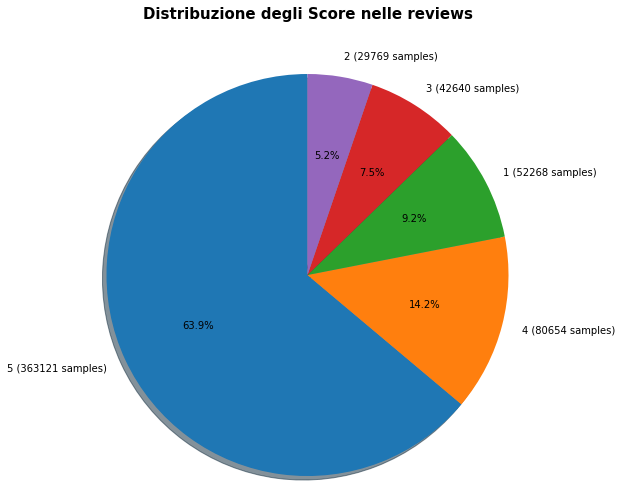

In [15]:
from matplotlib import pyplot as plt

labels = [f'{k} ({df["Score"].value_counts()[k]} samples)' for k in df['Score'].value_counts().keys()]
sizes = dict(df['Score'].value_counts()).values()

fig1, ax1 = plt.subplots(figsize=(8,8))
ax1.pie(sizes, labels=labels, autopct='%1.1f%%',
        shadow=True, startangle=90)
ax1.axis('equal')
ax1.set_title("Distribuzione degli Score nelle reviews",pad=40, fontweight='bold', fontsize=15)
plt.show();

1. Il 78% circa delle recensioni nel set di dati sono recensioni positive con valutazioni > 3 (4 e 5)
2. Il 14% circa delle recensioni nel set di dati sono recensioni negative con valutazioni < 3 (1 e 2)
3. Le restanti recensioni dell'8% hanno una valutazione di 3.

In [16]:
df.to_csv("./dataset/Reviews_Clean.csv", index=False)

### Creazione di dataset di dimensioni differenti

Sono stati generati dataset di dimensioni (approssimativamente) di 85/152/604 MB e 1.2 GB, oltre al dataset originale che ha dimensione ~300 MB.

La scelta dei record da includere è effettuata con un sampling randomico (con un seed preimpostato, per la ripetibilità).

In [17]:
def sample_all_sizes(dataset):
    for size in [0.25, 0.5, 2, 4]:
        n_rows = round(dataset.shape[0] * size)
        sampled_df = dataset.sample(n=n_rows, random_state=42, replace=True)
        filename = './dataset/Reviews{}.csv'.format(int(size*2048))
        sampled_df.to_csv(filename, index=False)

In [19]:
sample_all_sizes(df)